In [1]:
%config Completer.use_jedi = False

# Data Science

### Workflow

The process generally goes as follows:
1. Ask a question
    - what is the scientific goal
    - what do you want to predict or estimate
2. Determine the necessary data
    - what is the sample size needed
    - what data needed to proof or reject hypothesis
3. Get the data
    - how were the data sampled
    - is there any relevancy between data
4. Clean and organize the data
    - is the data readable
    - get rid of nasty data
    - trasform tabular data
5. Explore the data
    - pivoting
    - are there anomalies?
    - are there a pattern?
6. Model the data
    - build the model
    - fit the model
    - validate the model
7. Communicate your findings
    - what do we find?
    - interpret the model
    - find isights or sulution

#### 1. Comes up with question
before we hit the code or doing machine learning or build a model. it is important to determine or question, but why?  
if we had a question, it can be our goal or starting point where to begin or what to find.  
baseline of determining question is :  
- Not too abstract or general
- Not too specific  

example:  
"IS MEN LIVE IN INDONESIA?" OR "HOW MANY JAWA WEARING BATIK LIVING IN JOGJA LEARNING MATH WHILE ON RICE FIELDS?"

#### 2. Why Cleaning the Data?
as a human we can recognize the data format is right or not and we can recognize where the value belongs to and we still can organize small data. what if the data is million record and have a lot of bad records?  

while organizing big data we use computer to get the job done. but the computer is very specific and literated. if there are any bad record or bad data or A missing value or unlabeled column can completely throw them off their game. Even worse—your program could still run, but your outcomes would be incorrect. Ouch!

#### 3. Explore the Data
There are two strategies for exploring our data:

- Statistical calculations
- Data visualizations

python is very powerful in both case and its libraries can comes in handy to get the job done.  
> Numpy and scipy to do statistical calculation  
> Matplotlib and seaborn to do data visualization



# Machine Learning

## what is ML ?

problem that ml can solve :
1. credit scoring
2. insurance risk
3. price forecasting
4. spam filetering
5. customer segmentation

## Why machine learning?

## ML cautions

## Types of Machine Learing

1. Supervised Learning
2. Unsupervised Learning

Supervisedd learning :  
- Using historical and labeled data, the machine learning model predicts avalue
- requires historical labeled data means : known results and data from the past. and the desired output is known. 
- two main label types : 
> categorical value to predict -> classification task.
> Continuous Value to Predict -> regression Task
- classification task : Predict assigned category
> cancerous vs benign tumor
> fulfilment vs credit default
> assigning image category:
>> hand writing regocnition
- regression task : predict continuous value
> future prices
> electricity loads
> test scores


Unsupervised Learning :  
- Applied to unlabeled data, the machine learning model discovers possible patterns in the data.
- group and interpret data without label
> clustering customer into separate group based off their behaviour
- major downside of unsupervised learning is it much harder to evaluate performance of an unsupervised learning algorithm, because there was no historical "correct label"

## Supervised Learning

### Process and workflow

1. collecting and organizing dataset based on history
>labeled historical data
>data product : input (house) feature, ouput predicted selling price

2. separate X,y (Features, Label)
> label is what are we trying to predict, in this case (price column itself).  
> feature is the component or characteristic of the data that we are predicting the label from. in this case (area,bedroom,bathroom columns).  
notice that we have historical label and we are trying to predict whats in the future.

3. split data into training set and test set
> both training and test set have the same feature and label.  
> do the percentage split. most of the data should fall into train set, typically 70% for training.  
> with the data splitted. we have 4 component, there is (X train, X test, Y train, Y test)

> How to test the data
>> let the human algorithm learn about xtrain and y train.  
>> give human algorithm x test without y test (real historical result), then let it predict the y test value.  
>> compare the human algo prediction (y hat) with y test (real historical label).


4. Evaluate performance
> if we dont satisfied by the result of test prediction, then we adjust the model parameter.  
> re-train adjusted model.  
> evaluate performance again.

5. Deploy model
> with deployed model we have model as a service, dashboard, application.  
> hopefully we have data product that can be use to predict future outcomes or gain insights from data.

in supervised learning, we will perform split on the dataset into
X_train, X_test, y_train, y_test

general pattern for importing model in scikit learn:  
>> from sklearn.modelfamily import modelalgo  
mymodel = modelalgo(param1,param2)  
mymodel.fit(X_train,y_train)  
prediction = mymodel.predict(X_test)

evaluate model:
>> from sklearn.metrics import error_metric  
performance = error_metric(y_test,prediction)

----
----
----
## Train | Test Split Procedure 

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

----
----
----
## Train | Validation | Test Split Procedure 

This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

## Linear Regression

### extension of Linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\ACER\\Data science path\\Jose lesson\\08-Linear-Regression-Models\\Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


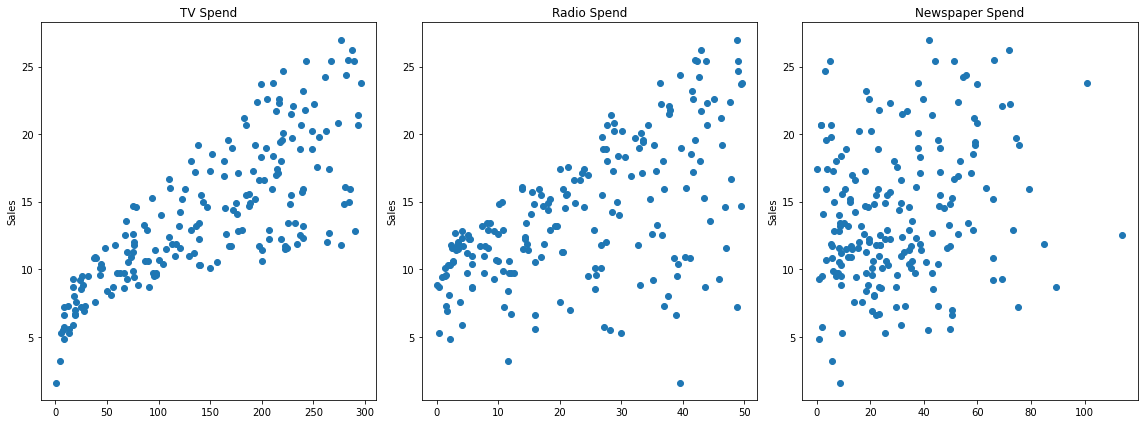

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Feature and label separation

In [6]:
X = df.drop('sales', axis=1)

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#test_size = what is the percentage of dataset being test data
#random state same with random seed in numpy, predetermine data shuffling and it is an arbitrary number

### Fitting model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [13]:
mymodel = LinearRegression()
mymodel.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [14]:
my_prediction = mymodel.predict(X_test)

### Evaluation Metrics

most common evaluation metrics for regression:
1. Mean Absolute error
2. Mean Square Error
3. Root Mean Square Erro

1. Mean Absolute Error
- easy to understand
- average of all predicted rows
- wont punish large error, see anscombe's quartet

2. Mean Square Error
- punish more large error 
- avoid anscombe quartet
- hard to interpret

3. Root Mean Square Error
- fix MSE y value
- fix punished large value

### Context of Performance Error

In [15]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

### Retrieve mean of label

In [16]:
df['sales'].mean()

14.0225

### Testing performance

In [17]:
MAE(y_test,my_prediction)

1.511669222454909

In [18]:
1.511669222454909/14.0225 *100

10.78031180213877

from the label mean, it is 10.8% error. is that considered as huge error? depend on context 

In [19]:
MSE(y_test,my_prediction)

3.7967972367152227

### From MSE square root it to fix y value

In [20]:
np.sqrt(3.7967972367152227)
#1.9485372043446394
1.9485372043446394/14.0225 *100

13.895790367941801

from the label mean, it is 14% error. is that considered as huge error? depend on context 

### Separate Residual

often it is a good idea to separate residual into new column or separated data. recall that residual is (y - y_hat) true y test value substracted by y prediction. this is why
1. determine linear regression is appropriate or not in our dataset
> famous anscombe quartet is not valid for linear regression, this is why residual plot comes in handy to judge that  

2. not matter how many feature do you have, plotting residual will give insight

Plot residual error to:
1. distribution plot, on its residual column
2. scatter plot, on true y test value

residual error should be random and close to normal distribution with mean close to zero.  
because we want them to be close to zero which mean our prediction is more accurate

when plotting residual error against y true value, we set red line on 0 y axis.
the perfect fit condition is when your residual datapoint is on red line or nearby it. also, it is not creating a pattern

In [21]:
test_residual = y_test - my_prediction

<AxesSubplot:xlabel='sales', ylabel='Density'>

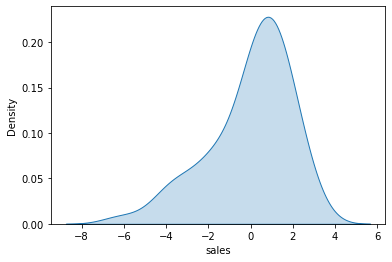

In [22]:
sns.kdeplot(test_residual,shade=True)

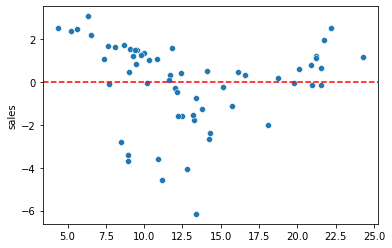

In [23]:
sns.scatterplot(x=my_prediction,y=test_residual)
plt.axhline(y = 0,color='red',ls='--')

### Tools for reading distribution

In [24]:
import scipy as sp

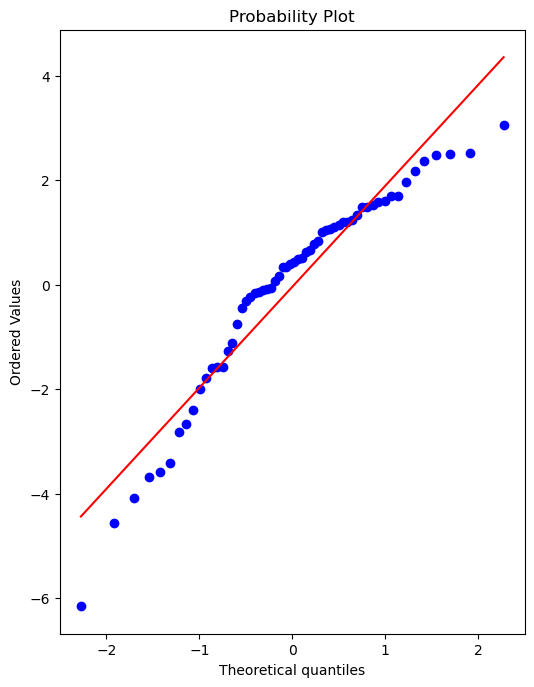

In [25]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residual,plot=ax)

## Consider we satisfied by the model and Ready to Deploy the model

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(X,y)

LinearRegression()

In [28]:
y_hat = final_model.predict(X)

In [29]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

### Interpret Coefisien

Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

### saving and loading ML Model

In [30]:
from joblib import dump,load

In [31]:
dump(final_model,'first_kevin_model.joblib')

['first_kevin_model.joblib']

In [32]:
try_load = load('first_kevin_model.joblib')

In [33]:
campaign = [[200,86,10]]
try_load.predict(campaign)

array([28.29502499])

## Polynomial Implementation

From multiple variable, we want to dig up and seek maximization of the variable

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
ply_converter = PolynomialFeatures(include_bias= False, degree=2) #instancing transformer

In [36]:
ply_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [37]:
poly_features = ply_converter.transform(X)
#instant fit transform can call .fit_transform()

In [38]:
print(poly_features[0])
print(X.iloc[0])

[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]
TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64


In [39]:
print(230.1**2) #this [3]
print(230.1*37.8) #this [4]
print(230.1*69.2) #this [5]
print(37.8**2) # this[6]
print(37.8* 69.2) #this [7]
print(69.2**2) #this[8]

52946.009999999995
8697.779999999999
15922.92
1428.8399999999997
2615.7599999999998
4788.64


### train test split poly feature

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=42)

### Fitting Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model_with_poly = LinearRegression()

In [44]:
model_with_poly.fit(X_train,y_train)

LinearRegression()

In [45]:
poly_predict =model_with_poly.predict(X_test)

In [46]:
poly_predict

array([17.22263805, 22.76431942, 20.34240311,  7.63823081, 24.43070212,
       12.62670906, 22.77581025,  8.17257308, 12.1434595 , 15.59295774,
        7.70321153,  8.13970713, 11.94050296,  6.00239435, 10.52156294,
       12.29998882,  6.73498649, 16.59405075, 10.56966577, 19.02896977,
       20.15426466, 13.93688799,  9.49270709, 22.09007022,  8.81726594,
        7.63831359, 22.36845761, 12.63105172, 10.12142254,  6.02913868,
       11.66988463, 10.06960308, 23.4843312 ,  9.85934368, 15.33869793,
       21.07332794, 10.9676273 , 20.14554654, 11.74470764,  6.4231513 ,
       10.71450186, 12.83429003,  9.18959984,  8.91317752, 11.87160951,
        6.97626924,  9.95713385, 14.69620775, 10.1058211 , 11.2550714 ,
       14.04197399, 12.14298425,  8.96411937,  7.54429236,  8.39739662,
       10.86854626,  9.89471268, 25.23373739,  6.79877024, 11.96203194])

### Evaluation of polynomial

In [47]:
from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE

In [48]:
MAE_result = MAE(y_test,poly_predict)
print(MAE_result)

0.5905974833808021


In [49]:
MSE_result = MSE(y_test,poly_predict)
print(MSE_result)

0.5231944949055404


In [50]:
RMSE = np.sqrt(MSE_result)
print(RMSE)

0.7233218473857542


In [51]:
df['sales'].mean()

14.0225

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**
* Mean of sales = 14.0225
* Simple Linear Regression:
    * MAE: 1.511
    * RMSE: 1.948

* Polynomial 2-degree:
    * MAE: 0.590
    * RMSE: 0.723

### Choosing best Poly degree

In [52]:
RMSE_train_result = []
RMSE_test_result = []
MAE_train_result = []
MAE_test_result = []
degree = range(1,11)

for d in range(1,11):
    #convert features into polyfeatures
    ply_converter = PolynomialFeatures(degree=d, include_bias=False)
    ply_converter.fit(X)
    poly_features = ply_converter.transform(X)
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=42)
    
    #training model
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    #predict train and test
    train_prediction = poly_model.predict(X_train)
    test_prediction = poly_model.predict(X_test)
    
    #evaluating
    MAE_train = MAE(y_train,train_prediction)
    MAE_test = MAE(y_test,test_prediction)
    
    RMSE_train = np.sqrt(MSE(y_train,train_prediction))
    RMSE_test = np.sqrt(MSE(y_test,test_prediction))
    
    #appending to global
    RMSE_train_result.append(RMSE_train)
    RMSE_test_result.append(RMSE_test)
    MAE_train_result.append(MAE_train)
    MAE_test_result.append(MAE_test)

In [53]:
print(RMSE_train_result) 
#print(RMSE_test_result)
#print(MAE_train_result)
#print(MAE_test_result)

[1.5745968305905438, 0.5950712355838924, 0.46887581118220867, 0.3694689701771537, 0.2438220746051811, 0.19687764140097325, 0.547492490821684, 0.16796526008536955, 0.15886560360547386, 0.16441690381173338]


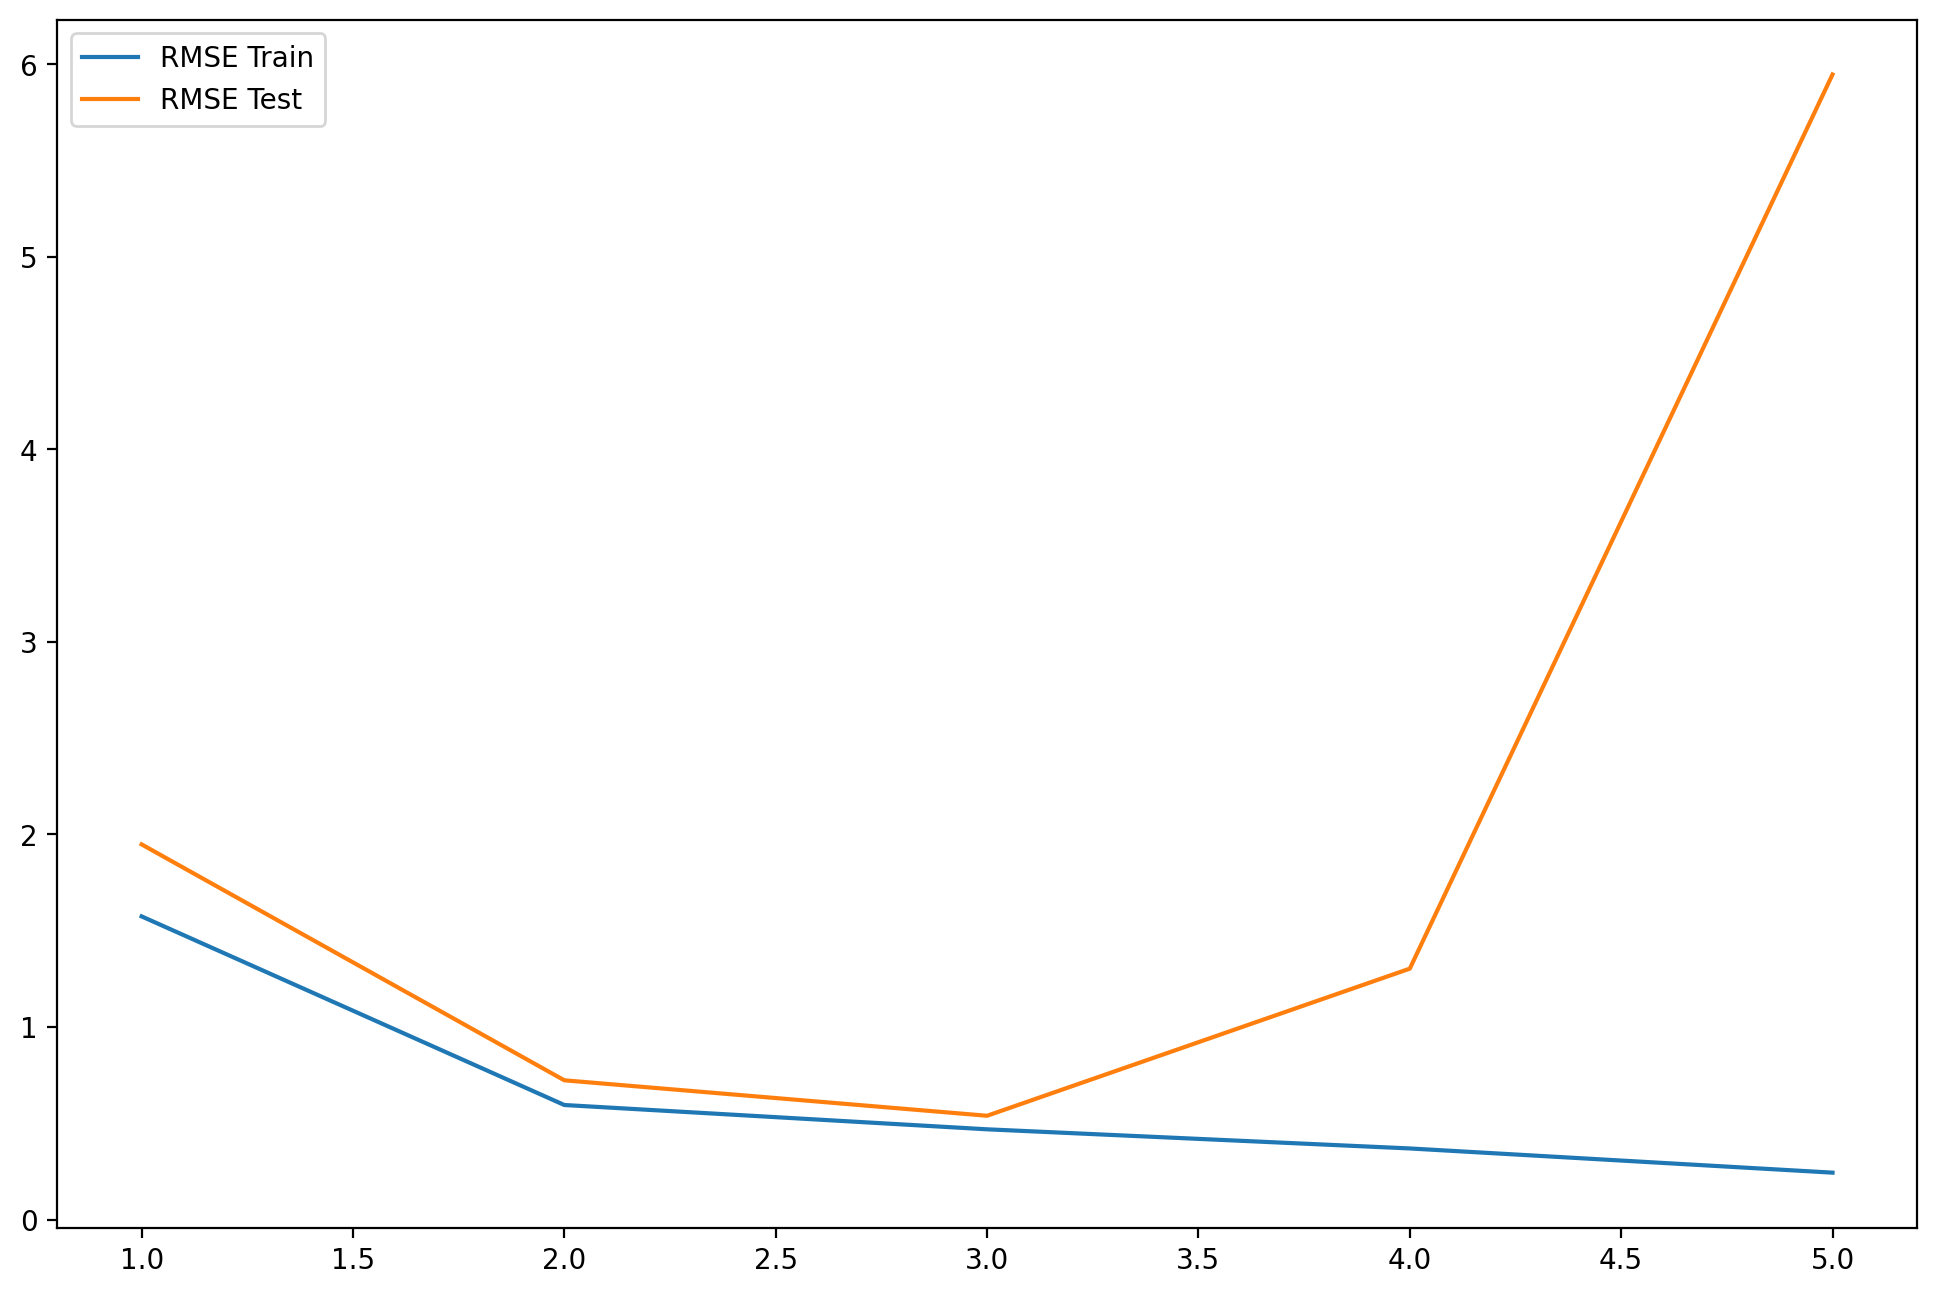

In [54]:
# plotting error
plt.figure(figsize=(12,8),dpi=200)
plt.plot(range(1,6),RMSE_train_result[:5], label='RMSE Train')
plt.plot(range(1,6),RMSE_test_result[:5], label='RMSE Test')
plt.legend()
plt.show()

In [55]:
from joblib import dump,load

In [73]:
final_polyconvert = PolynomialFeatures(degree=3,include_bias=False)
finalmodel= LinearRegression()
finalmodel.fit(final_polyconvert.fit_transform(X),y)

LinearRegression()

In [74]:
dump(final_polyconvert,'3 deg polynomial converter.joblib')

['3 deg polynomial converter.joblib']

In [75]:
dump(finalmodel,'model_kevin.joblib')

['model_kevin.joblib']

### loading model

In [76]:
poly_convert = load('3 deg polynomial converter.joblib')
model = load('model_kevin.joblib')

In [77]:
campaign = [[190,280,61]]
campaign_poly = poly_convert.transform(campaign)

In [78]:
model.predict(campaign_poly)

array([153.03026754])

# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\ACER\\Data science path\\Jose lesson\\08-Linear-Regression-Models\\Advertising.csv')

In [3]:
X = df.drop('sales',axis=1)
y = df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polyconverter = PolynomialFeatures(degree=3,include_bias=False)
poly_X = polyconverter.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
standarization = StandardScaler()

In [11]:
#prevent statistic information leakage
standarization.fit(X_train)

StandardScaler()

In [12]:
X_train = standarization.transform(X_train)
X_test = standarization.transform(X_test)

In [13]:
from sklearn.linear_model import Ridge

help(Ridge)

In [15]:
L2_model = Ridge(alpha=10) #10 is currently arbitrary
L2_model.fit(X_train,y_train) # this is scaled x train

Ridge(alpha=10)

In [17]:
L2_test_pred = L2_model.predict(X_test)
L2_test_pred

array([13.7469803 , 19.17764   , 11.8623393 , 16.25574551,  8.92891155,
        8.04595366, 20.13320851, 16.94847676, 10.29219174, 19.78365691,
       10.31758361, 13.44077317, 12.24228062, 23.23864236, 19.12656362,
        9.748809  , 12.84361521,  9.14248129,  8.82504966, 21.46989971,
        8.25222201, 18.8110776 , 28.39227333, 25.06911066,  9.11912241,
       11.8071711 , 20.85199462,  9.31962495, 12.25122303,  9.07811198,
        9.25275556, 19.87154568, 10.55955497,  7.86818084, 17.67220132,
        9.31442423, 10.1539168 ,  9.47802944,  8.63337302, 10.76209179,
       11.63848891, 10.38883411, 10.90270005,  8.40019284, 11.35336224,
       10.3514086 ,  8.00082147, 15.27139854, 12.94761469, 22.49762978,
       10.80165407, 13.01337743, 14.82204895, 11.37354043, 11.69628953,
        7.20576885, 25.53512232, 10.41926545, 17.38798022, 15.10158819])

In [18]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE

In [19]:
MAE_result = MAE(y_test,L2_test_pred)
RMSE_result = np.sqrt(MSE(y_test,L2_test_pred))

In [21]:
MAE_result

0.5774404204714166

In [22]:
RMSE_result

0.8946386461319675

### Using Cross validation to find best alpha

In [23]:
from sklearn.linear_model import RidgeCV

In [46]:
lstest = np.linspace(0.01,6,60)
lstest

array([0.01      , 0.11152542, 0.21305085, 0.31457627, 0.41610169,
       0.51762712, 0.61915254, 0.72067797, 0.82220339, 0.92372881,
       1.02525424, 1.12677966, 1.22830508, 1.32983051, 1.43135593,
       1.53288136, 1.63440678, 1.7359322 , 1.83745763, 1.93898305,
       2.04050847, 2.1420339 , 2.24355932, 2.34508475, 2.44661017,
       2.54813559, 2.64966102, 2.75118644, 2.85271186, 2.95423729,
       3.05576271, 3.15728814, 3.25881356, 3.36033898, 3.46186441,
       3.56338983, 3.66491525, 3.76644068, 3.8679661 , 3.96949153,
       4.07101695, 4.17254237, 4.2740678 , 4.37559322, 4.47711864,
       4.57864407, 4.68016949, 4.78169492, 4.88322034, 4.98474576,
       5.08627119, 5.18779661, 5.28932203, 5.39084746, 5.49237288,
       5.59389831, 5.69542373, 5.79694915, 5.89847458, 6.        ])

In [47]:
L2_CV = RidgeCV(alphas=lstest,scoring='neg_root_mean_squared_error')
L2_CV.fit(X_train,y_train)

RidgeCV(alphas=array([0.01      , 0.11152542, 0.21305085, 0.31457627, 0.41610169,
       0.51762712, 0.61915254, 0.72067797, 0.82220339, 0.92372881,
       1.02525424, 1.12677966, 1.22830508, 1.32983051, 1.43135593,
       1.53288136, 1.63440678, 1.7359322 , 1.83745763, 1.93898305,
       2.04050847, 2.1420339 , 2.24355932, 2.34508475, 2.44661017,
       2.54813559, 2.64966102, 2.75118644, 2.85271186, 2.95423729,
       3.0557..., 3.15728814, 3.25881356, 3.36033898, 3.46186441,
       3.56338983, 3.66491525, 3.76644068, 3.8679661 , 3.96949153,
       4.07101695, 4.17254237, 4.2740678 , 4.37559322, 4.47711864,
       4.57864407, 4.68016949, 4.78169492, 4.88322034, 4.98474576,
       5.08627119, 5.18779661, 5.28932203, 5.39084746, 5.49237288,
       5.59389831, 5.69542373, 5.79694915, 5.89847458, 6.        ]),
        scoring='neg_root_mean_squared_error')

In [48]:
L2_CV.alpha_

0.01

In [52]:
L2_CV.best_score_

-0.593145584936541

In [38]:
from sklearn.metrics import SCORERS

In [41]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [50]:
L2_cv_test_pred = L2_CV.predict(X_test)

In [53]:
L2_MAE = MAE(y_test,L2_cv_test_pred)
L2_RMSE = np.sqrt(MSE(y_test,L2_cv_test_pred))

In [55]:
L2_MAE

0.41018731832935523

In [56]:
L2_RMSE

0.5829610859826417

### L1 LASSO regularization

In [57]:
from sklearn.linear_model import LassoCV

In [69]:
L1_cv_model = LassoCV(eps=0.01,n_alphas=100,max_iter=1000000)
L1_cv_model.fit(X_train,y_train)

LassoCV(eps=0.01, max_iter=1000000)

In [71]:
L1_cv_pred = L1_cv_model.predict(X_test)

In [72]:
L1_MAE = MAE(y_test,L1_cv_pred)
L1_RMSE = np.sqrt(MSE(y_test,L1_cv_pred))

In [73]:
L1_cv_model.alpha_

0.049430709092258295

In [74]:
L1_MAE

0.5159788188265408

In [75]:
L1_RMSE

0.7615440303260839

In [76]:
L1_cv_model.coef_

array([ 2.35600233,  0.21183181,  0.        , -0.        ,  3.78675114,
       -0.        ,  0.        ,  0.0624318 ,  0.        , -1.01152151,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

### Elastic Net

In [77]:
from sklearn.linear_model import ElasticNetCV

In [79]:
EN_cv = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],
                    eps=0.001,max_iter=1000000,n_alphas=100)
EN_cv.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [80]:
EN_cv_pred = EN_cv.predict(X_test)

In [81]:
EN_cv.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [82]:
EN_cv.alpha_

0.004943070909225827

In [86]:
EN_cv.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [87]:
#best ratio
EN_cv.l1_ratio_

1.0

In [83]:
EN_MAE = MAE(y_test,EN_cv_pred)
EN_RMSE = np.sqrt(MSE(y_test,EN_cv_pred))

In [84]:
EN_MAE

0.43350346185900673

In [85]:
EN_RMSE

0.6063140748984029

# Feature Engineering and Data Preparation

not every real world data set is machine learning ready. often we spend our time mostly to prepare the data to be implemented on machine learning model.

definition of feature engineering.  
process of extracting features from raw data via data mining techniques and with domain expertise.  
domain knowledge has huge portion while doing feature engineering. thus, there is no exact 100% fixed techniques to be implemented in the process.

3 approaches of feature engineering.  
- extract
- combine
- transform

### extracting
what is extracting approaches?  
oftenly we met common timestamp format like 2020-July-22 03:45:51.  
current timestamp format cannot directly fed to machine learning model, we need to extract particular information from the timestamp.  
we can achieve year = 2020  
month = 06  
day =  22  
hour= 03  
minutes = 45  
second=  51  

### Combining 

what is combining approaches?  
- combine multiple features into single feature
- extend feature by combing multiple features to find potential relationship (just like polynomial)
- combine extracted information, create new feature by combining them based on extracted information

### Transforming infromation
what is transforming approaches?  
- very common in string information
- we cannot multiply or doing math with 'far' or 'no airport nearby' or 'yes'
- often categorical data is presented by string information

transformation approaches :
1. Integer encoding  
Pros :
- very easy to do 
- doesnt increase number of features  
Cons :
- implies ordered relationship between each category
2. one hot encoding (Dummy Variables)  
Convert each category into individual features that are either 0 or 1  
we can reduce dimension of dummy variable by doing on the higher level instead. and this is the domain knowledge comes in to play  
Pros:  
- no ordering implied  
Cons:
-  potentially to create new features and coefficient
-  not easy to create a new feature
- dummy variable trap consideration

## Dealing with Outliers

Outlier comefrom sampling error, data bias, data point misbehave

Outliers Consideration.
- range and limit
- percentage of data

#### range and limit outliers  
we need to define this type of outliers with below methodology :
- standard deviation
> any data above 3 std might considered as an outlier or something like that
- IQR interquartile range
> we can define a data point as an outlier with IQR. like, an outlier will be 2x IQR, 3x IQR, 5x IQR. and again there is no fixed value to fit to all problem.
- visualized or domain limit value


#### Detect Outliers
- using EDD
- using boxplot
- using histogram
- using scatterplot

### How to deal with outlier
1. capping or flooring  
we will cut off any point larger than 3* percentile99 and set the value into it (CAPPING).  
we will cut off any point lower than 0.3* percentile1 and set the value into it (flooring)
2. sigma approach  
usually we replace an outlier with mean +- x*std

those are the popular methods to deal with outliers.  
by doing capping, we set any outlier with the value of 3*Percentile(99) for upper limit and 0.3* percentile(1) or using mean +- x*std 

#### Percentage of data  
keep in mind of you have 10% of your data is an outliers, then that is a wide distribution not outliers.  
you can limit outliers to a few percentage points.

### Give caveats for our model
when you found a lot of outlier, you can drop them and said this model can only handle value below (the outliers)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
generated_age = create_ages()
generated_age

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

## How to detect outlier

D:\anaconda\envs\Kevin x DS\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

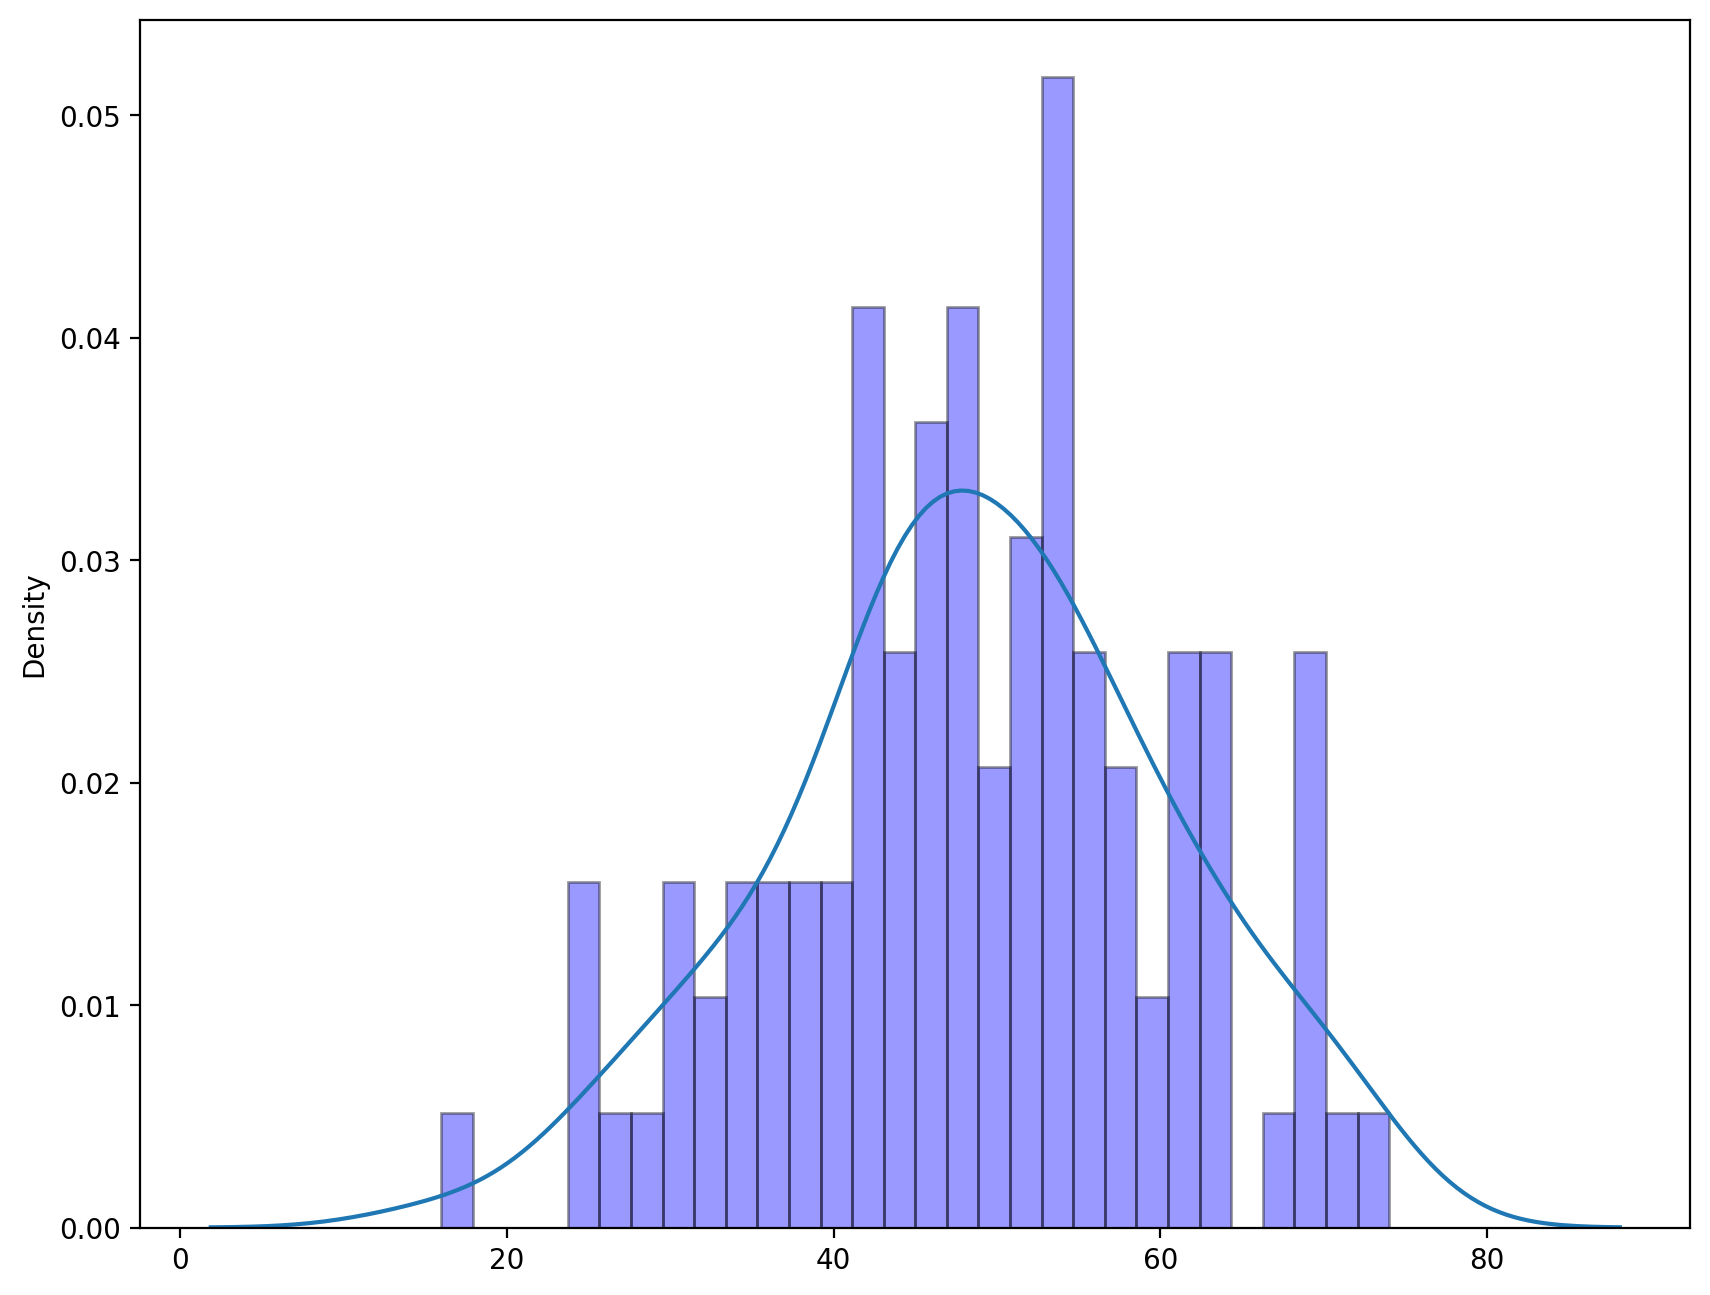

In [4]:
# check the distribution
plt.figure(figsize=(10,8),dpi=200)
sns.distplot(generated_age,bins=30,hist_kws={'lw':1,'color':'b','edgecolor':'black'})
plt.plot

#keep your eye into the value below 20, is that an outlier?

D:\anaconda\envs\Kevin x DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

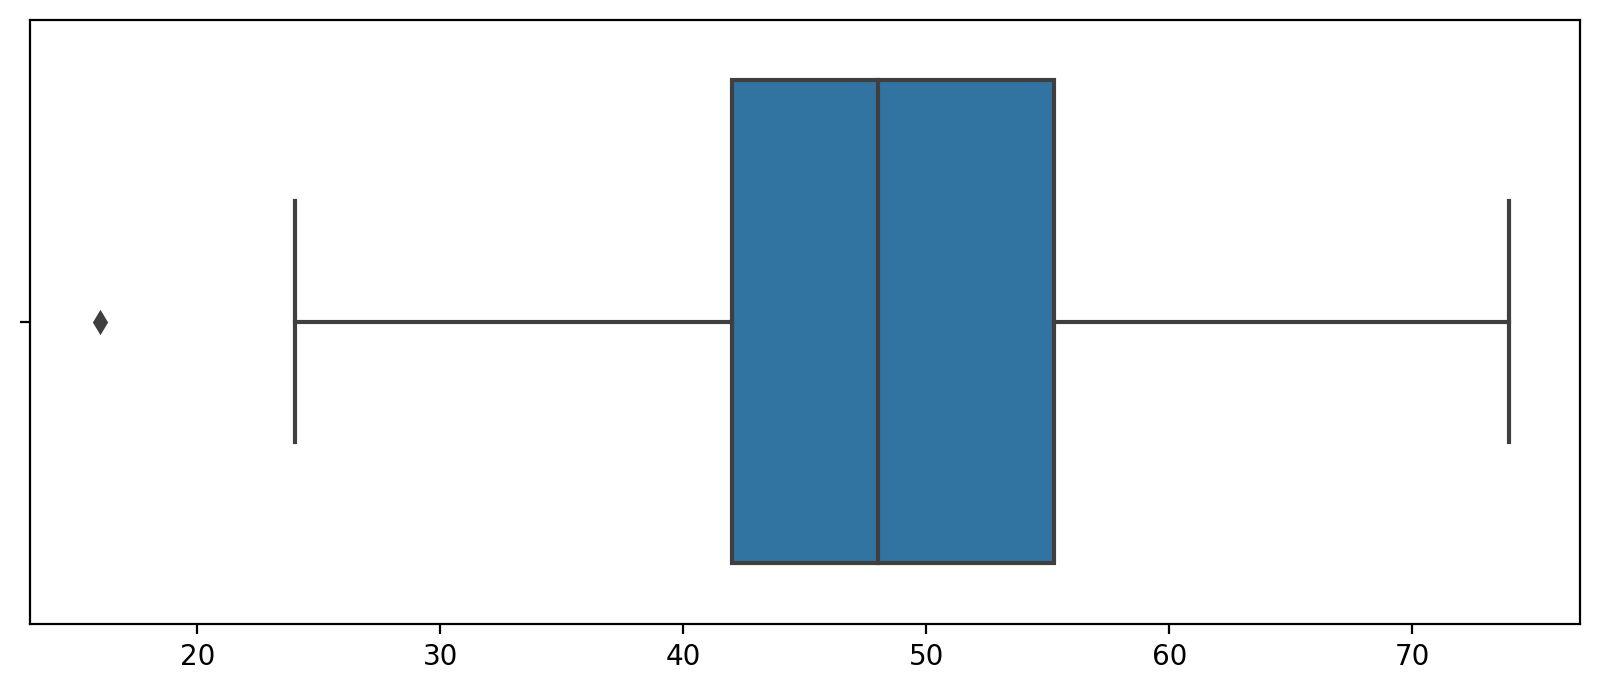

In [5]:
# distplot might not enough to detect an outlier. we try boxplot instead
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(generated_age)

In [6]:
# get another indepth information
df = pd.Series(generated_age)
df.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [7]:
#find iqr
q3,q1 = np.percentile(df,[75,25])
iqr = q3-q1
low_limit = q1- 1.5*iqr
low_limit

22.125

In [8]:
# we will work this out with real data example
df = pd.read_csv('Jose lesson\\DATA\\Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
#seek correlationship only to our y label
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

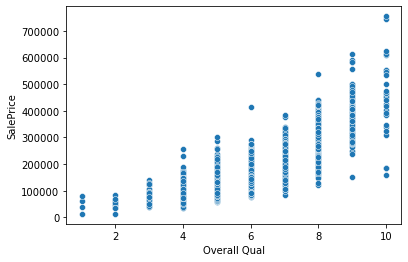

In [10]:
# check the heaviest correlation to our y label
# Overall Qual,Gr Liv Area,Garage Cars
sns.scatterplot(y='SalePrice',x='Overall Qual',data=df)

notice why perfect overall quality house have low sale price?
these data points are suspicious, lets dig more deeper

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

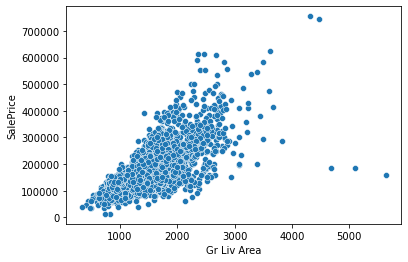

In [11]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

both of those plots showing how domain knowledge comes in to play.  
notice 3 data point where they not match common relationship unlike the other data points.  
lets find out who are they in dataset

In [12]:
df[(df['SalePrice'] <250_000) & (df['Overall Qual'] >8) & (df['Gr Liv Area'] > 4500)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
#drop these data

In [14]:
outliers = df[(df['SalePrice'] <250_000) & (df['Overall Qual'] >8) & (df['Gr Liv Area'] > 4500)].index

In [15]:
df_cpy = df.copy()
df_cpy.drop(outliers,axis=0,inplace=True)

In [16]:
len(df_cpy)

2927

## Warning
you just had deleted the outliers, and you might think it is fine. but domain knowledge not saying the same. that outliers are houses that have sold recently or not? who knows if the trend in the particular city is changing, like maybe great houses price drop due to something that the only domain knowledge knows it.

## Dealing with Missing data

In [24]:
pwd

'C:\\Users\\ACER\\Data science path'

In [91]:
with open('C:\\Users\\ACER\\Data science path\\Jose lesson\\DATA\\Ames_Housing_Feature_Description.txt','r') as data:
    print(data.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [42]:
#since we already have unique identifier, we could drop PID column in dataset which indicating unique identifier
df_cpy.drop('PID',axis=1,inplace=True)

In [43]:
df_cpy.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [53]:
df_cpy.isnull().sum() /len(df_cpy)

MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167407
Lot Area          0.000000
Street            0.000000
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [60]:
# we want to know the percentage of missing data instead of the number of missing data for each columns
def missing_percetage(df):
    number_na = 100* df.isnull().sum()/ len(df)
    number_na = number_na[number_na > 0].sort_values()
    return number_na

In [75]:
percent_na = missing_percetage(df_cpy)
percent_na

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

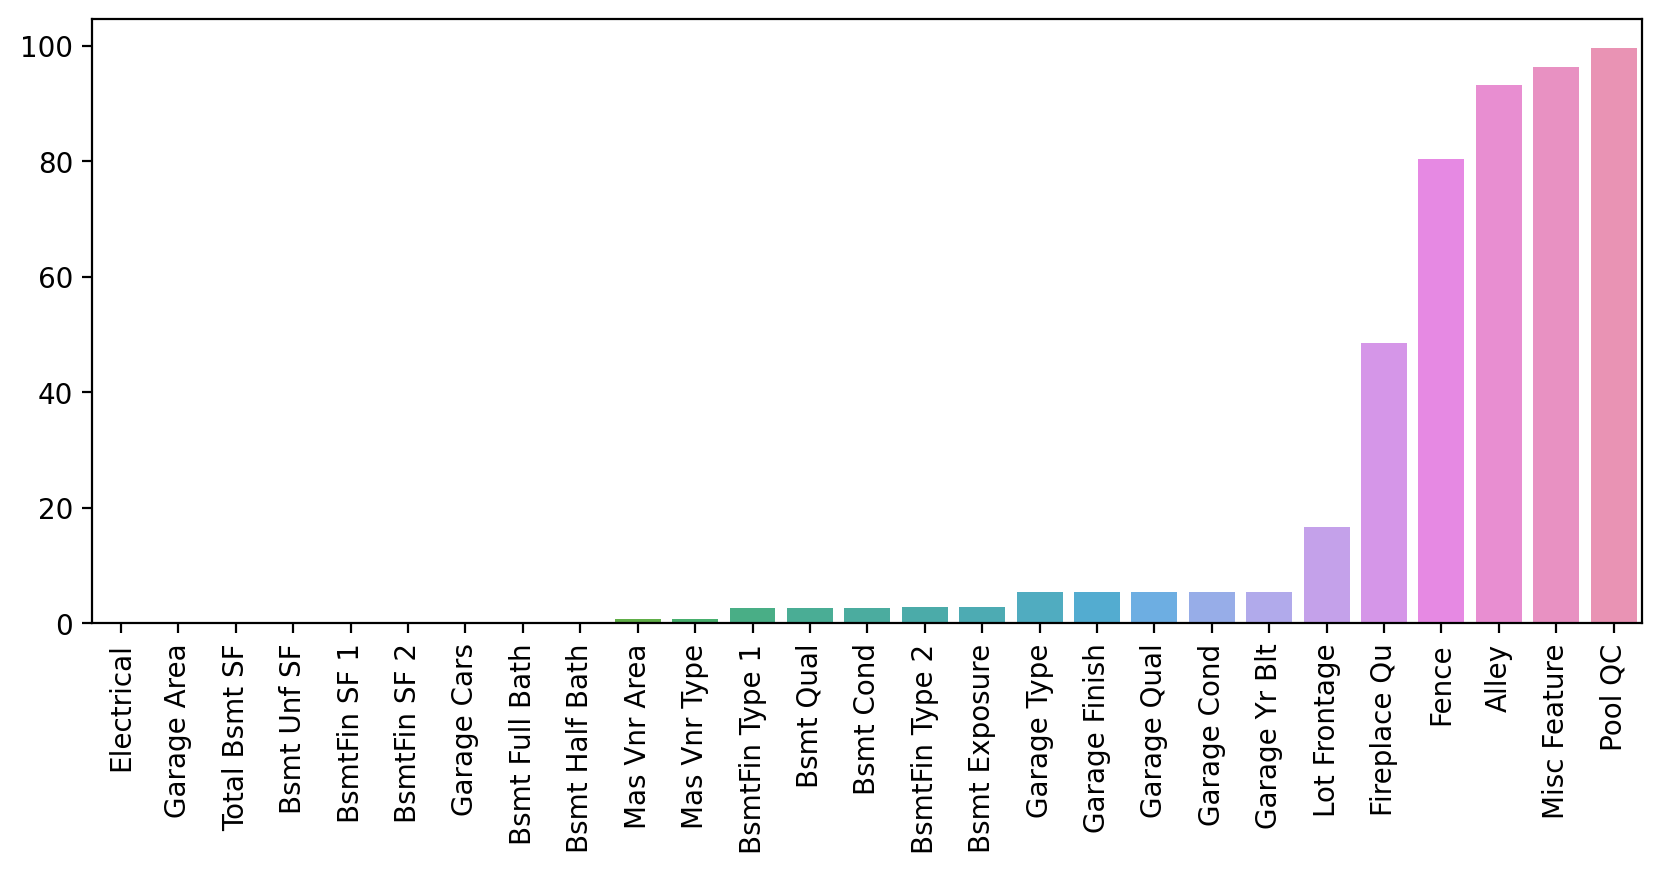

In [79]:
#visualize it to get better understanding
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=percent_na.index,y=percent_na)
plt.xticks(rotation=90)
plt.show()

in the case of a few missing data, we will consider drop this row or filling it with reasonable assumption and once again you need domain knowledge to perform this task.
## from this on we will talking about missing data and how to treat them based on rows

it is impossible for us to drop 99% of the row. hence we look after a row that have bad record/missing value. based from above barplot, we can set a treshold for the rows to be drop in case we cant fix them.

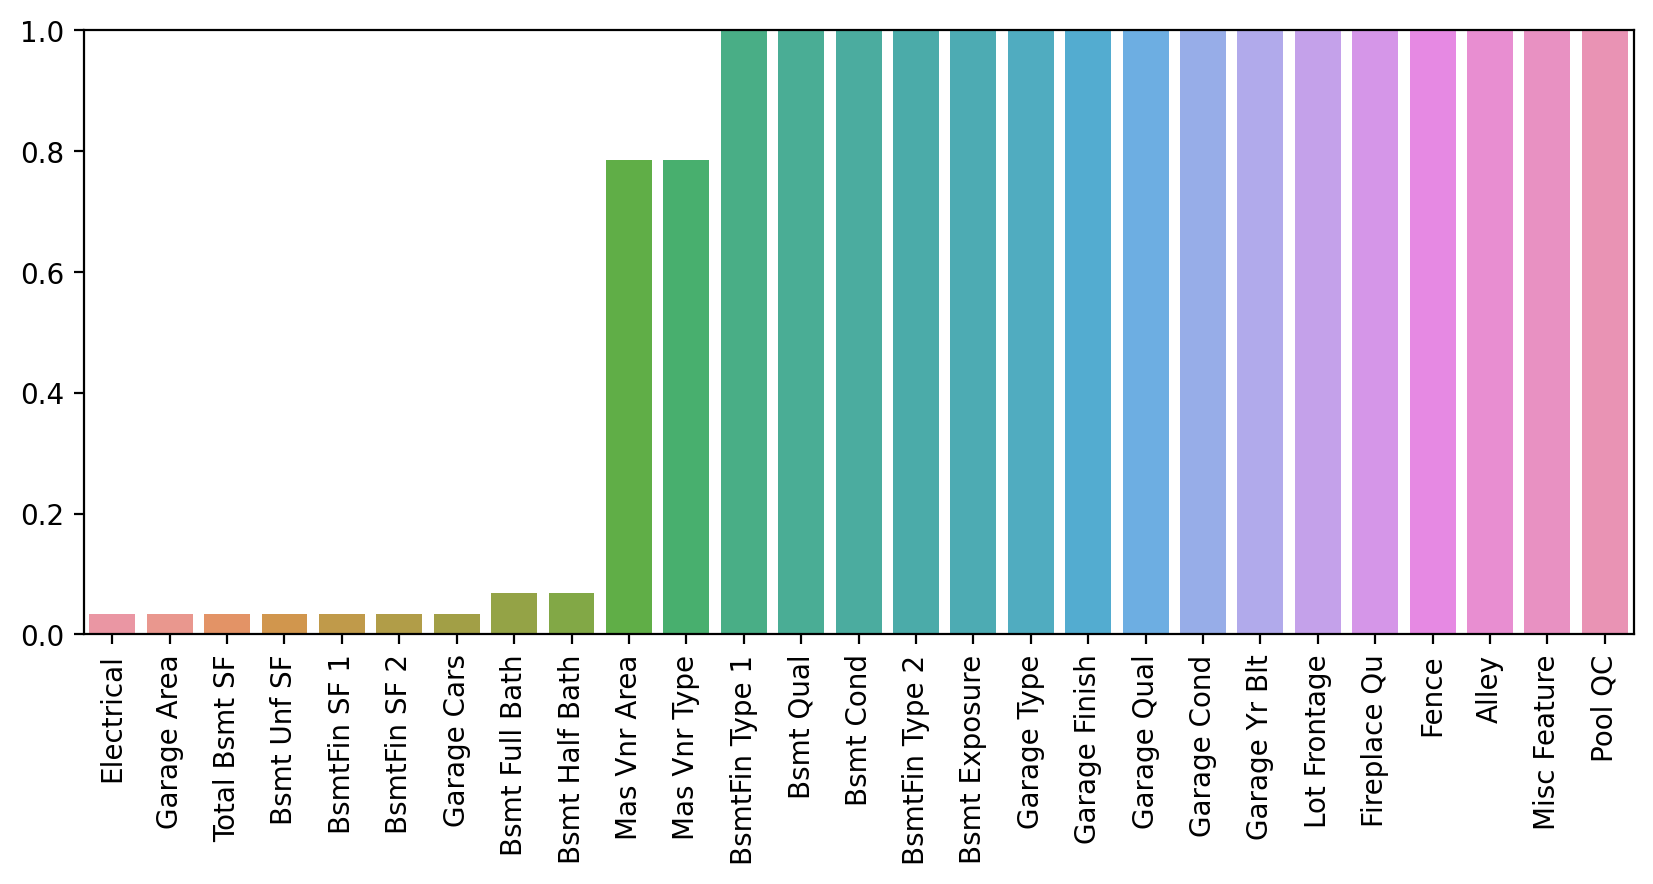

In [80]:
## Set a treshold to a 1 percent of total data
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=percent_na.index,y=percent_na)
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

from above chart, we can say that column electrical to basement hald bath is worth dropping because they are very small amount from total record we have. but we would do the best as we can to save the data's information.

In [86]:
# gather all rows below 1% missing data in our data set
percent_na [percent_na < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [82]:
# gather information what is the actual number of that percentage from the total records
100/ len(df_cpy)

#this is showing us that 0.034 is one row

0.0341646737273659

In [93]:
#find the row in our data 
df_cpy[(df_cpy.Electrical.isnull()) | (df_cpy['Garage Area'].isnull()) | (df_cpy['Total Bsmt SF'].isnull()) | 
       (df_cpy['Bsmt Unf SF'].isnull())|
      (df_cpy['BsmtFin SF 1'].isnull()) |
      (df_cpy['BsmtFin SF 2'].isnull()) |
      (df_cpy['Bsmt Full Bath'].isnull()) |
      (df_cpy['Bsmt Half Bath'].isnull()) ]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


### analyze missing data with dataset references

-- row with index 1341 -- electical value missing --   
that one row with electical value is null, we cannot save the row because we dont know/dont have reasonable reason to fill the null. besides, the value type is categorical and references not expecting any zero/null/NA values.  
we can fix the null default value with a help of domain knowledge.

### Filling value with reasonable value or based on references

In [130]:
df_cpy['Mas Vnr Type'] = df_cpy['Mas Vnr Type'].fillna('None')
df_cpy['Mas Vnr Area'] = df_cpy['Mas Vnr Area'].fillna(0)
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df_cpy[bsmt_str_cols] = df_cpy[bsmt_str_cols].fillna('None')

In [132]:
percent_na = missing_percetage(df_cpy)
percent_na[percent_na < 1]

Series([], dtype: float64)

-- row with index 1557 -- garage value missing --  
when we study the references about garage value, any row with value 0 means they dont have garage. we have reasonable reason to consider a null value is the same as 0, because they met a condition of not having a garage. we can save the information by change the null value with zero (0)

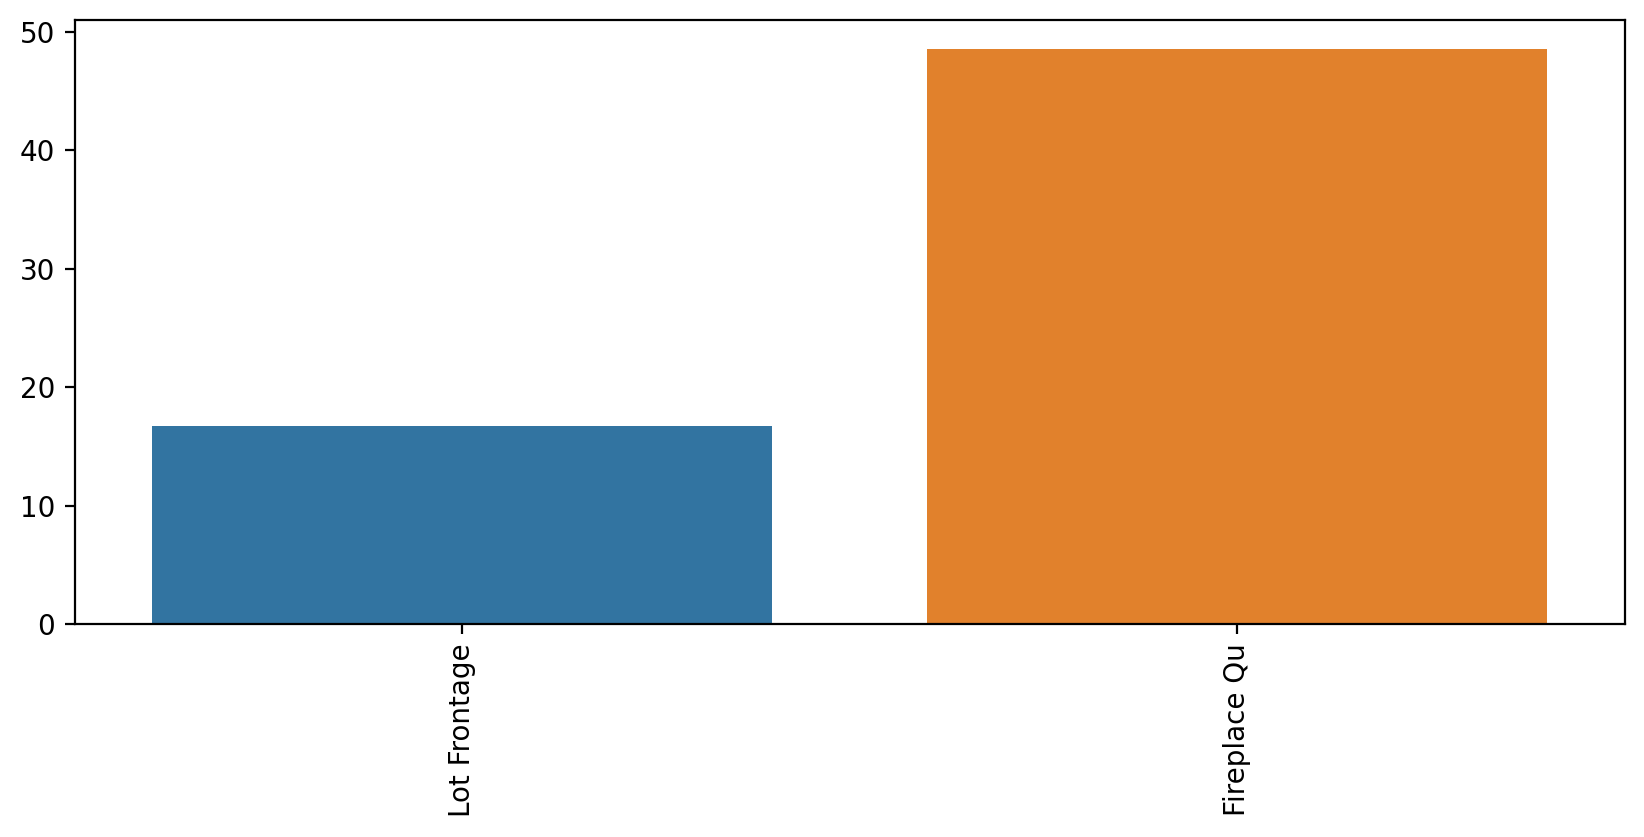

In [146]:
## Set a treshold to a 1 percent of total data
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=percent_na.index,y=percent_na)
plt.xticks(rotation=90)
#plt.ylim(0,1)
plt.show()

## Dropping value based on columns

there are 2 main approaches :
- Filling some value into missing value 
- drop the feature column

when drop the feature column :
- this is easiest to do
- no longer to worry about that feature in the future
- potentially lose possible important signal
- should consider drop feature approach when most of rows are missing the value

when filling missing data :
- potentially changing ground truth of the data, because we made up something
- when you fill the missing value, must based on reasonable asumption
- must apply same transformation to all future data for prediction

simplest case when filling missing value: 
- replace all NAN with zero if that Nan implied zero

hardest case :
- must use statistical method based on other column

example of using statistical method :
- we fill missing age with 20 based on education or career (eg college student data)
- average of college student age

### deal with missing value based on column

In [141]:
percent_na = missing_percetage(df_cpy)
percent_na[percent_na < 20]

Lot Frontage    16.74069
dtype: float64

In [135]:
#based from the last chart we have a few small missing value. and garage group majority is a string type
# when we done the reading references, we know if a row dont have a garage type then the row dont have any garage type
grg_str = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
grg_int = ['Garage Yr Blt']

In [144]:
df_cpy[grg_str] = df_cpy[grg_str].fillna('None')
df_cpy[grg_int] = df_cpy[grg_int].fillna(0)
df_cpy.drop(columns=['Pool QC','Electrical','Misc Feature','Alley','Fence'],inplace=True)

In [145]:
percent_na = missing_percetage(df_cpy)
percent_na

Lot Frontage    16.740690
Fireplace Qu    48.582166
dtype: float64

In [148]:
#count the middle missing value features category
df_cpy['Fireplace Qu'] = df_cpy['Fireplace Qu'].fillna('None')

In [151]:
df_cpy[['Lot Frontage','Neighborhood']]

,Lot Frontage,Neighborhood
0,141.0,NAmes
1,80.0,NAmes
2,81.0,NAmes
3,93.0,NAmes
4,74.0,Gilbert
...,...,...
2925,37.0,Mitchel
2926,NaN,Mitchel
2927,62.0,Mitchel
2928,77.0,Mitchel


In [165]:
df_cpy['Lot Frontage'] = df_cpy.groupby('Neighborhood')['Lot Frontage'].transform(lambda x : x.fillna(x.mean()))
df_cpy['Lot Frontage'] = df_cpy['Lot Frontage'].fillna(0)

In [166]:
percent_na = missing_percetage(df_cpy)
percent_na

Series([], dtype: float64)

# im messed up by messing electrical features

In [173]:
pwd

'C:\\Users\\ACER\\Data science path'

In [175]:
df = pd.read_csv('C:\\Users\\ACER\\Data science path\\Jose lesson\\DATA\\Ames_NO_Missing_Data.csv')

In [176]:
df_cpy = df.copy()

In [178]:
# MSSubClass is actually categorical data with ordinal type not an integers. we should convert it to str
df_cpy['MS SubClass'] = df_cpy['MS SubClass'].apply(str)

In [177]:
#grab all categorical data
df_cpy.select_dtypes(include='object')

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [179]:
# separate object features and numeric features
object_feature = df_cpy.select_dtypes(include='object')
int_feature = df_cpy.select_dtypes(exclude='object')

In [181]:
# convert into dummy variable or one hot encoding
dummy_variable = pd.get_dummies(object_feature,drop_first=True)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [182]:
final_df = pd.concat([int_feature,dummy_variable],axis=1)

In [185]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64